<a href="https://colab.research.google.com/github/FGalvao77/Modelo-preditivo-para-valor-de-venda-de-imovel---dataset-boston/blob/main/Modelo_preditivo_para_valor_de_venda_de_im%C3%B3vel_dataset_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo preditivo para valor de venda de imóvel  - `dataset boston`**

---



## **1) Introdução**

**Contextualizando**

> O desafio é criar um modelo preditivo para valor de venda de imóveis.
<br><br>
O conjunto de dados utilizados é o famoso _dataset boston_.<br>Existem 14 atributos em cada caso do conjunto de dados. Eles são:
1. `crim` - taxa de criminalidade per capita por cidade;
2. `zn` - proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados;
3. `indus` - proporção de acres de negócios não varejistas por cidade;
4. `chas` - variável dummy de Charles River (1 se a área limita o rio; 0 caso contrário);
5. `nox` - concentração de óxidos nítricos (partes por 10 milhões);
6. `rm` - número médio de cômodos por habitação;
7. `age` - proporção de unidades ocupadas pelo proprietário construídas antes de 1940;
8. `dis` - distâncias ponderadas até cinco centros de empregos de Boston;
9. `rad` - índice de acessibilidade a rodovias radiais;
10. `tax` - valor total da taxa de imposto sobre a propriedade por _10.000  dólares americanos_;
11. `ptratio` - proporção professor-aluno por cidade;
12. `black` - 1000 (black - 0,63) ^ 2 onde black é a proporção de negros por cidade;
13. `lstat` -% status inferior da população;
14. `medv` - valor médio de casas ocupadas pelo proprietário em _1.000 dólares americanos_.

- O dataste original se encontra no site:
 - https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html





**Detalhes**

> Porém o conjunto de dados que iremos utilizar ele se encontra embutido na biblioteca do `PyCaret`.
<br><br>O desafio é descobrir quais **features** tem maior influência com a variável alvo - `medv`.

**Vamos para o desafio!**

## **2) Instalando e importando as bibliotecas**

Primeiro vamos instalar a biblioteca `joblib`.
> **Joblib** é um conjunto de ferramentas para fornecer pipelining leve em Python. <br>Em particular:
1. cache de disco transparente de funções e reavaliação lenta (padrão memoize)
2. computação paralela simples e fácil;
<br><br>Joblib é otimizado para ser **rápido** e **robusto** em grandes dados em particular e tem otimizações específicas para matrizes _numpy_. É **licenciado por BSD**.

- https://joblib.readthedocs.io/en/latest/

In [1]:
# instalando a biblioteca "joblib"
!pip install joblib

In [2]:
# comando para instalar a biblioteca "pycaret"
!pip install pycaret

In [3]:
# importando as demais bibliotecas e funções necessárias
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
# from sklearn.ensemble import *

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoLars
# from sklearn.linear_model import *
# from sklearn.linear_model import ElasticNet

# from xgboost import XGBRegressor 

from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.metrics import r2_score

from sklearn.svm import SVR

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from joblib import dump, load

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
# importando a função para carregamento dos datasets do pycaret
from pycaret.datasets import get_data

In [5]:
# visualizando os datasets embutidos no pycaret
get_data('index');

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


> Iremos utilizar o dataset `boston` para para estimar o valor de venda do imóvel, portanto um problema de _regressão_.

## **3) Importando o conjunto de dados**

In [6]:
# instanciando o dataset "boston" no objeto com o mesmo nome
boston = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## **4) Análise exploratória dos dados**

In [7]:
# dimensão do conjunto de dados 
boston.shape    # linhas e colunas

(506, 14)

In [8]:
# visualizando o dataset 
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
# informações gerais
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
# visualizando informações da variável alvo
boston[['medv']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medv    506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [11]:
# estatística descritiva
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [12]:
# instanciando as colunas na variável "features"
features = boston.columns
features    # visualizando as features

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [13]:
# instanciando a feature alvo (target)
target = 'medv'
target

'medv'

In [14]:
# contabilizando dados nulos no conjunto de dados - frequência relativa
total = boston[features].isnull().sum().sort_values(ascending = False)
percent = (boston[features].isnull().sum()/boston[features].isnull().count()*100).sort_values(ascending = False)
missing  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
crim,0,0.0
zn,0,0.0
indus,0,0.0
chas,0,0.0
nox,0,0.0
rm,0,0.0
age,0,0.0
dis,0,0.0
rad,0,0.0
tax,0,0.0


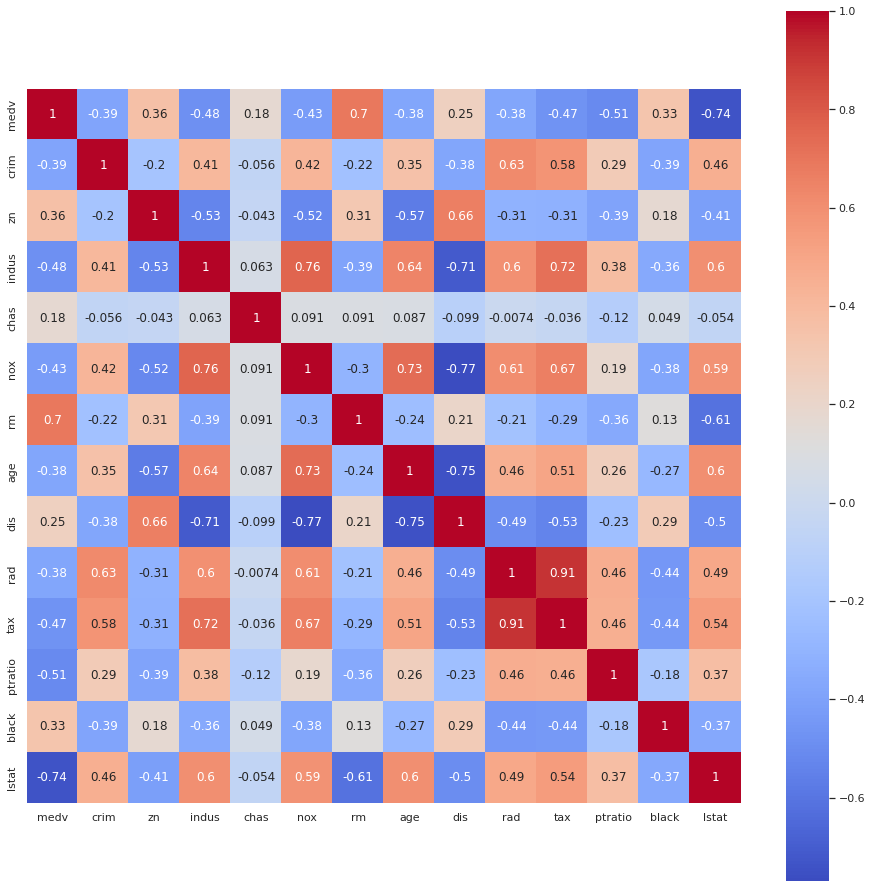

In [15]:
# plotando gráfico de calor da correlação entre as variáveis
data_map = boston[[target]]

data_map[features] = boston[features]
plt.figure(figsize=(16, 16))
sns.heatmap(data_map.corr(), annot=True, square=True, cmap='coolwarm')

plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

<Figure size 1296x504 with 0 Axes>

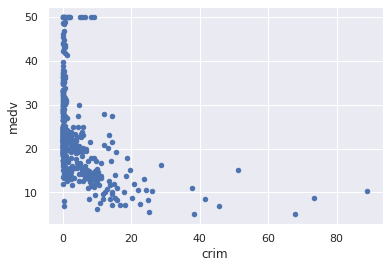

<Figure size 1296x504 with 0 Axes>

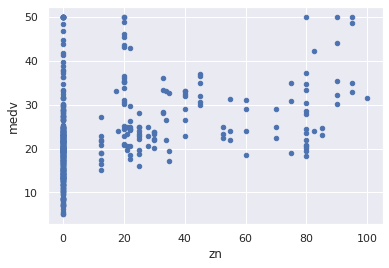

<Figure size 1296x504 with 0 Axes>

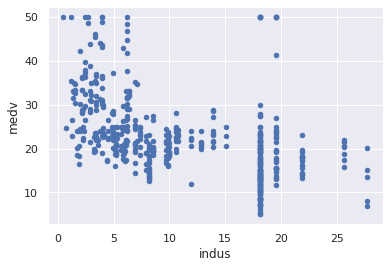

<Figure size 1296x504 with 0 Axes>

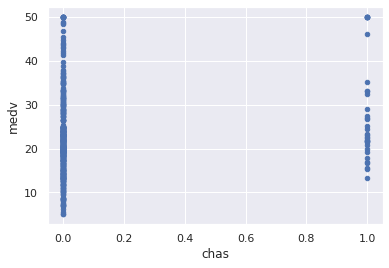

<Figure size 1296x504 with 0 Axes>

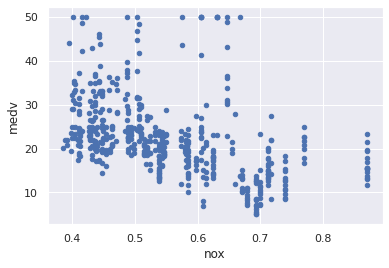

<Figure size 1296x504 with 0 Axes>

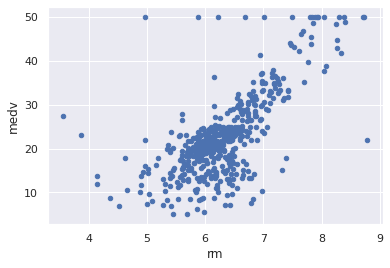

<Figure size 1296x504 with 0 Axes>

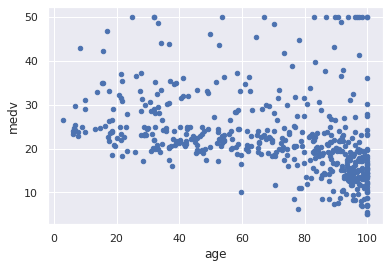

<Figure size 1296x504 with 0 Axes>

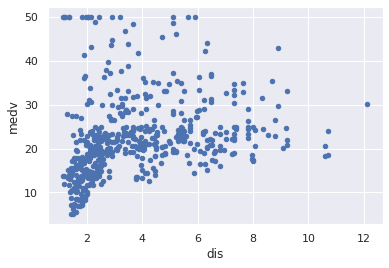

<Figure size 1296x504 with 0 Axes>

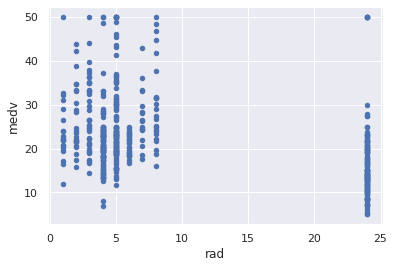

<Figure size 1296x504 with 0 Axes>

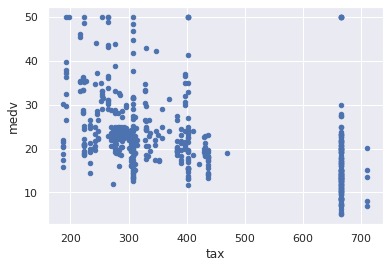

<Figure size 1296x504 with 0 Axes>

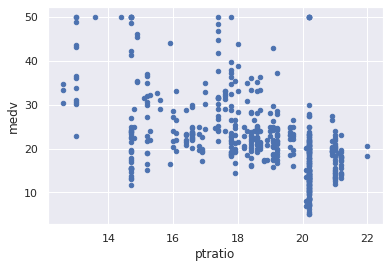

<Figure size 1296x504 with 0 Axes>

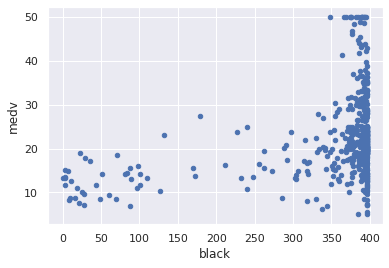

<Figure size 1296x504 with 0 Axes>

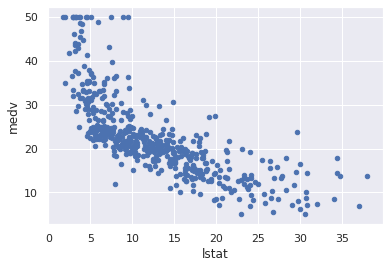

<Figure size 1296x504 with 0 Axes>

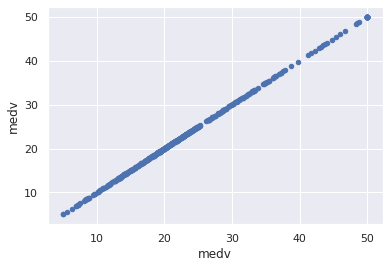

In [16]:
# plotando gráfico de dispersão entre a variável alvo (medv) VS as demais features (colunas)
for column in features:
    plt.figure(figsize = (18, 7))
    boston.plot(kind='scatter', x=column, y=target);

## **5) Limpeza dos dados**

In [17]:
# visualizando se há dados duplicados
duplicated_data = boston.duplicated()
boston[duplicated_data]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


## **6) Pré-processamento dos dados**

In [18]:
# particionando os dados em duas partes - uma parte para modelagem do modelo e outra para validação do modelo
data = boston.sample(frac=0.7, random_state=786)
data_unseen = boston.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (354, 14)
Unseen Data For Predictions: (152, 14)


In [19]:
# criando uma cópia do conjunto de dados para treino
# e instanciando como "train"
train = data.copy()

# instanciando as features de interesse da variável "train"
train = train.loc[:, features]

# eliminado a variável alvo dos dados de treino
train.dropna(subset=[target], inplace=True)

In [20]:
# particionando os dados em treino e teste
X = train.drop([target], axis=1)
y = train[target]

In [21]:
# instanciando as features numéricas
numerical_columns = list(X._get_numeric_data().columns)

# instanciando as features categóricas
categorical_columns = list(set(X.columns) - set(numerical_columns))

In [22]:
# instanciando um pipeline para as features numéricas
numerical_pipeline = Pipeline([
        ('data_filler', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# instanciando um pipeline para as features categóricas
categorical_pipeline = Pipeline([
        ('data_filler', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

In [23]:
# aplicando os pipelines e, realizando a transformação das features - numéricas e categóricas
transformer = ColumnTransformer([
    ("numerical", numerical_pipeline, numerical_columns),
    ("categorical", categorical_pipeline, categorical_columns)
])

In [24]:
# particionando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 123)

In [25]:
# visualizando o tamanho das partições
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(247, 13)
(107, 13)
(247,)
(107,)


## **7) Construindo os modelos**

In [26]:
# criando uma função para execução do pipeline de modelos
def execute_pipeline(clf, X, y, title):
    
    pipe = Pipeline([
        ('transformer', transformer),
        ('reduce_dim', 'passthrough'),
        ('classify', clf)
    ])

    N_FEATURES_OPTIONS = [2, 4, 8]
    
    param_grid = [
        {
            'reduce_dim': [PCA()],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [SelectKBest()],
            'reduce_dim__k': N_FEATURES_OPTIONS
        },
    ]
    reducer_labels = ['PCA', 'KBest']

    grid = GridSearchCV(pipe,  param_grid=param_grid, scoring='r2', cv=10, verbose=1, n_jobs=-1, return_train_score=True)
    grid.fit(X, y)

    mean_train_scores = np.array(grid.cv_results_['mean_train_score'])
    mean_scores = np.array(grid.cv_results_['mean_test_score'])
    mean_scores = mean_scores.reshape(2, len(N_FEATURES_OPTIONS))
    bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) * (len(reducer_labels) + 1) + .5)

    plt.figure()
    COLORS = 'bgrcmyk'

    for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
        plt.bar(bar_offsets + i, mean_train_scores[i], label='{} train'.format(label),alpha=.7)
        plt.bar(bar_offsets + i, reducer_scores, label='{} test'.format(label), color=COLORS[i])

    plt.title(title)
    plt.xlabel('Number of features')
    plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
    plt.ylabel('Classification accuracy')
    plt.ylim((0, 1))
    plt.legend(loc='upper left')

    plt.show();

In [27]:
# criando uma função para treinar os modelos
def train_ensemble_models(X, y):
    clf1 = LinearRegression()
    clf2 = Lasso(alpha=.5)
    clf3 = Ridge(alpha=.1)
    clf4 = LassoLars(alpha=.1)
    clf5 = AdaBoostRegressor(n_estimators=1_500)
    clf6 = SVR(kernel='rbf',gamma='scale', C=100)
    clf7 = GradientBoostingRegressor(n_estimators=1_500)

    for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7], ['Linear Regression', 'Lasso', 
                                                                       'Ridge','Lasso Lars','Ada Boost Regressor',
                                                                        'SVR', 'Gradient Boosting Regressor']):
        execute_pipeline(clf, X, y, label)

## **8) Avaliando os modelos**

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished


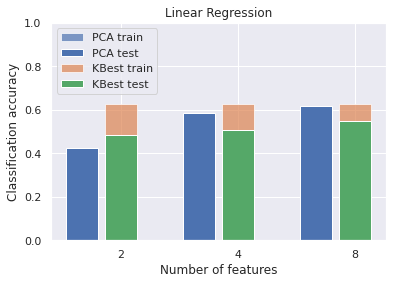

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished


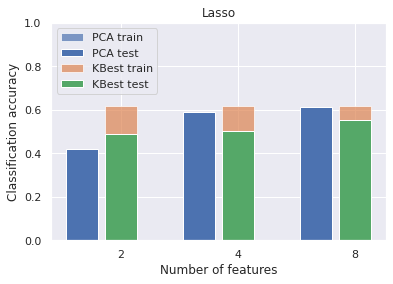

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished


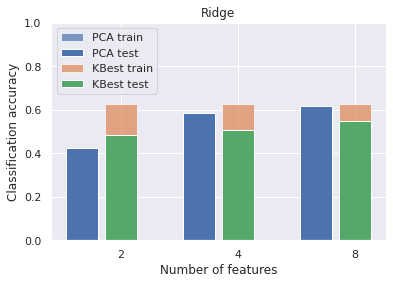

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished


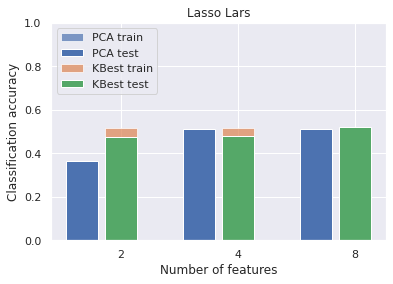

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   43.7s finished


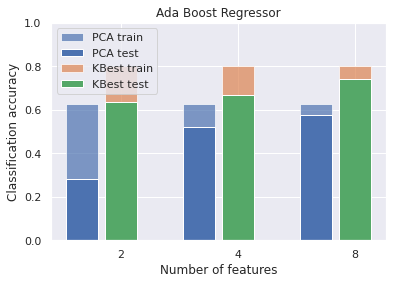

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished


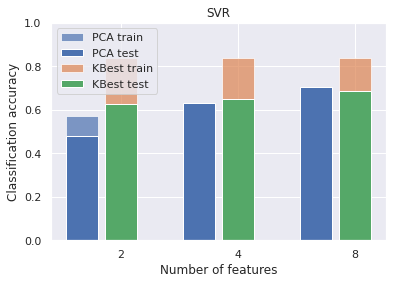

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   37.5s finished


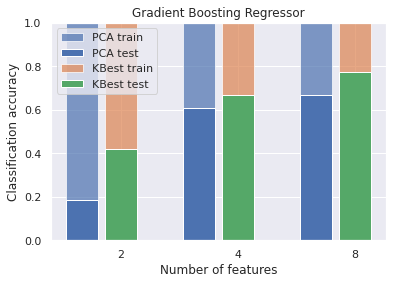

In [28]:
# aplicando a função de treino (train_ensemble_models) nos dados de treino
grid_result = train_ensemble_models(X_train, y_train)

## **9) Validando o modelo**

In [29]:
# validando o modelo
transformer = transformer
reduction = SelectKBest(k=8)
model = GradientBoostingRegressor()

X_train_transformer = transformer.fit_transform(X_train)
X_test_transformer = transformer.transform(X_test)

X_train_reduction_transformer = reduction.fit_transform(X_train_transformer, y_train)
X_test_reduction_transformer = reduction.transform(X_test_transformer)

model.fit(X_train_reduction_transformer, y_train)

y_predict = model.predict(X_test_reduction_transformer)

rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
r2 = r2_score(y_test, y_predict)
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 3.6194568873537136
R2 score is 0.8418429777377712


In [30]:
# realizando um for nas features de maior importância
for features, importances in zip(data.columns, 
                                 model.feature_importances_):
    print(f'{features}: {importances * 100}')

crim: 7.30929839200059
zn: 0.1979309303466438
indus: 1.3975352832138692
chas: 3.5775525468575284
nox: 21.37024719257742
rm: 2.808741702267092
age: 2.2713344465988854
dis: 61.067359506137976


In [31]:
# criando um dataframe com os dados de treino e com as features mais importantes
cols = reduction.get_support(indices=True)
new_features = []

for bool, feature in zip(cols, X_train.columns):
    if bool:
        new_features.append(feature)
        
dataframe = pd.DataFrame(X_train, columns=new_features)
dataframe

,zn,indus,chas,nox,rm,age,dis
0,95.0,1.47,0,0.403,7.135,13.9,7.6534
74,25.0,4.86,0,0.426,6.619,70.4,5.4007
148,0.0,8.14,0,0.538,5.813,90.3,4.6820
53,0.0,8.14,0,0.538,5.834,56.5,4.4986
22,0.0,19.58,0,0.605,6.319,96.1,2.1000
...,...,...,...,...,...,...,...
83,0.0,6.91,0,0.448,5.682,33.8,5.1004
17,0.0,6.20,0,0.504,8.266,78.3,2.8944
230,0.0,7.38,0,0.493,6.312,28.9,5.4159
98,0.0,3.41,0,0.489,7.007,86.3,3.4217


In [32]:
# criando um dataframe com os dados de treino e com as features mais importantes
cols = reduction.get_support(indices=True)
new_features = []

for bool, feature in zip(cols, X_train.columns):
    if bool:
        new_features.append(feature)
        
dataframe = pd.DataFrame(X_train, columns=new_features)
dataframe

,zn,indus,chas,nox,rm,age,dis
0,95.0,1.47,0,0.403,7.135,13.9,7.6534
74,25.0,4.86,0,0.426,6.619,70.4,5.4007
148,0.0,8.14,0,0.538,5.813,90.3,4.6820
53,0.0,8.14,0,0.538,5.834,56.5,4.4986
22,0.0,19.58,0,0.605,6.319,96.1,2.1000
...,...,...,...,...,...,...,...
83,0.0,6.91,0,0.448,5.682,33.8,5.1004
17,0.0,6.20,0,0.504,8.266,78.3,2.8944
230,0.0,7.38,0,0.493,6.312,28.9,5.4159
98,0.0,3.41,0,0.489,7.007,86.3,3.4217


In [33]:
# instanciando os dados de treino como "target" na dataframe criado
dataframe['target'] = y_train

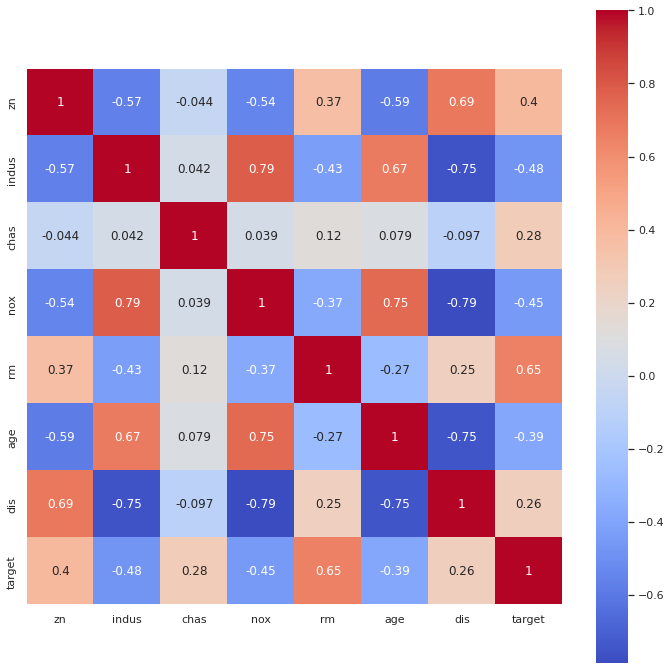

In [34]:
# visualizando a correlação entre as variáveis VS o target
plt.figure(figsize=(12, 12))
sns.heatmap(dataframe.corr(), annot=True, square=True, cmap='coolwarm')
plt.show();

## **10) Salvando o modelo e os resultados**

In [35]:
# criando um dicionário para guardar as informações do modelo
persistence = {}

persistence['transformer'] = transformer
persistence['reduction'] = reduction
persistence['model']  = model

dump(persistence, 'persist.joblib')

['persist.joblib']

In [36]:
# visualizando o dicionário
persistence

{'model': GradientBoostingRegressor(),
 'reduction': SelectKBest(k=8),
 'transformer': ColumnTransformer(transformers=[('numerical',
                                  Pipeline(steps=[('data_filler',
                                                   SimpleImputer(strategy='median')),
                                                  ('std_scaler',
                                                   StandardScaler())]),
                                  ['crim', 'zn', 'indus', 'chas', 'nox', 'rm',
                                   'age', 'dis', 'rad', 'tax', 'ptratio',
                                   'black', 'lstat']),
                                 ('categorical',
                                  Pipeline(steps=[('data_filler',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('encoder',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
      

In [37]:
# instanciando os dados não vistos pelo modelo
dataset_test = data_unseen

In [38]:
# visualizando o dataset de teste
dataset_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
1,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
2,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
3,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
4,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
148,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
149,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
150,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6


In [39]:
# carregando o dicionário de modelo
persistence = load('persist.joblib')

# instanciando os objetos para a transformação, a pré-processamento e o modelo para aplicação no dataset de teste
transformer = persistence['transformer']
reduction = persistence['reduction']
model = persistence['model']

# aplicando a transformação no dataset de teste
dataset_test_transformer = transformer.transform(dataset_test)
dataset_test_reduction_transformer = reduction.transform(dataset_test_transformer)

# realizando as predições com o dataset de  teste após as transformaçõe e seu pré-processamento
predictions = model.predict(dataset_test_reduction_transformer)

In [40]:
# visuzalizando as 20 primeiras predições
predictions[:20]

array([36.8484885 , 35.47865871, 24.86426253, 17.61490784, 22.31337783,
       21.27302009, 18.47868997, 15.73803354, 14.29181454, 16.6368658 ,
       15.87306247, 30.13452773, 19.1239827 , 16.29791397, 24.72098674,
       21.13639569, 32.68299749, 23.27622473, 22.75895285, 21.00204592])

In [41]:
# instanciando o dataframe "output" e as predições realizadas pelo modelo 
# e a coluna "age" do dataset de teste
output = pd.DataFrame({'age': dataset_test.age, 
                       'medv': predictions})

In [42]:
# visualizando o dataframe criado
output

,age,medv
0,61.1,36.848488
1,45.8,35.478659
2,58.7,24.864263
3,96.1,17.614908
4,61.8,22.313378
...,...,...
147,72.9,16.382070
148,65.3,21.034014
149,69.1,25.994794
150,76.7,21.839112


In [43]:
# salvando o dataframe em um arquivo "answer.csv"
output.to_csv('answer.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
